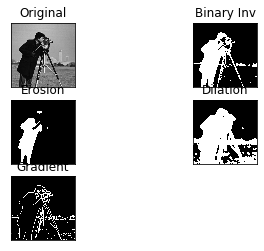

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = "C:\\Users\\rangr\\Desktop\\Image Processing\\misc\\"
imgpath1 =  path + "cameraman.tif"
img = cv2.imread(imgpath1, 0)
#    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

th = 0
max_val = 255


ret, binary_inv = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

#    k = np.ones((5, 5), np.uint8) #creating kernel manually(same as MORPH_RECT)

#    k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) #built in kernals
#    k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5, 5))
k = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))

erosion = cv2.erode(binary_inv, k, iterations = 5) #black takes over white, more iterations more effect

dilation = cv2.dilate(binary_inv, k, iterations = 5) #white occupies black

gradient = cv2.morphologyEx(binary_inv, cv2.MORPH_GRADIENT, k) #difference between Erosion and dilation, can find outline

output = [img, binary_inv, erosion, dilation, gradient]

titles = ['Original', 'Binary Inv', 'Erosion', 'Dilation', 'Gradient']

for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()  